## Install packages & download dataset

In [1]:
# !pip install kagglehub
# !pip install pandas
# !pip install nltk matplotlib spacy
# # !pip install torch torchvision torchaudio
# # !pip install 'transformers[torch]'
# !pip install langchain-openai
# !pip install evaluate rouge_score


In [2]:
# import kagglehub

# # Download High-Quality Financial News Dataset for NLP Tasks
# path = kagglehub.dataset_download("sayelabualigah/high-quality-financial-news-dataset-for-nlp-tasks")

# print("Path to dataset files:", path)

# import os
# import pandas as pd

# data_path = os.path.join(path, "dataset.csv")
# df_news = pd.read_csv(data_path)
# print("Number of news articles:", len(df_news))

# df_news.to_csv("news_articles.csv", index=False)

## Setup packages & import

In [3]:
import nltk, spacy
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
spacy.cli.download("en_core_web_sm")

[nltk_data] Downloading package punkt to /Users/ks/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/ks/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ks/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.8 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


## Data Preparation & Exploration:

In [4]:
import os
import pandas as pd

data_path = os.path.join("news_articles.csv")
df_news = pd.read_csv(data_path)
print("Number of news articles:", len(df_news))

# Remove rows with any Nan values
df_news = df_news.dropna()
# Remove rows with small content, compacted summary, or detailed summary
df_news = df_news[df_news['Content'].str.len() > 50]
df_news = df_news[df_news['CompactedSummary'].str.len() > 10]
df_news = df_news[df_news['DetailedSummary'].str.len() > 10]
print("Number of clean news articles:", len(df_news))

# Pick randomly 100 rows from the dataframe
df_news = df_news.sample(100, random_state=0)

# Sample output
df_news.head()

Number of news articles: 1839
Number of clean news articles: 1594


,Date,Subject,Content,ParaphrasedSubject,CompactedSummary,DetailedSummary,Impact
1102,15-May-24,ALYAMAMAH STEEL,Al Yamamah Steel Industries Co. announces its ...,Al Yamamah Steel Industries Co. Releases Half-...,Al Yamamah Steel Industries Co. reports improv...,Al Yamamah Steel Industries Co. has announced ...,Al Yamamah Steel Industries Co.'s positive fin...
1686,5-Jun-24,SAUDI CERAMICS,Saudi Ceramic Co. calls its shareholders to at...,Saudi Ceramic Co. Announces Extraordinary Gene...,Saudi Ceramic Co. has invited shareholders to...,Saudi Ceramic Co. has called its shareholders...,The extraordinary general assembly meeting wi...
183,12-Mar-24,ALMARAI,The Board of Directors of Almarai Company Invi...,Almarai Company Invites Shareholders to Extrao...,Almarai Company's Board of Directors invites s...,"Almarai Company, a listed joint-stock company,...",This meeting allows shareholders to participat...
1491,29-May-24,NAHDI,Nahdi Medical Co. Announces the Results of the...,Nahdi Medical Co. Reports General Assembly Mee...,Nahdi Medical Co. disclosed the outcomes of i...,Nahdi Medical Company has revealed the result...,The General Assembly Meeting results reflect ...
1313,22-May-24,RAWASI,Rawasi Albina Investment Co. Board invites its...,Rawasi Albina Investment Co. Announces Ordinar...,Rawasi Albina Investment Co. has invited share...,Rawasi Albina Investment Co. has announced an ...,Shareholders are encouraged to participate in ...


In [5]:
print("*"*100,"\nSample News Subject: \n", df_news['Subject'].iloc[0])
print("*"*100,"\nSample News Content: \n", df_news['Content'].iloc[0])     # Accessing the content of the first news article
print("*"*100,"\nSample News ParaphrasedSubject: \n", df_news['ParaphrasedSubject'].iloc[0]) 
print("*"*100,"\nSample News CompactedSummary: \n", df_news['CompactedSummary'].iloc[0]) 
print("*"*100,"\nSample News DetailedSummary: \n", df_news['DetailedSummary'].iloc[0]) 
print("*"*100,"\nSample News Impact: \n", df_news['Impact'].iloc[0]) 

**************************************************************************************************** 
Sample News Subject: 
 ALYAMAMAH STEEL
**************************************************************************************************** 
Sample News Content: 
 Al Yamamah Steel Industries Co. announces its Interim Financial results for the Period Ending on 2024-03-31 ( Six Months )  Element List Current Quarter Similar quarter for previous year %Change Previous Quarter % Change
Sales/Revenue 496.944 387.034 28.398 630.715 -21.209
Gross Profit (Loss) 68.323 7.063 867.336 72.932 -6.319
Operational Profit (Loss) 47.769 -9.259 - 49.119 -2.748
Net profit (Loss) 30.542 -17.894 - 29.549 3.36
Total Comprehensive Income 30.542 -17.894 - 29.549 3.36
All figures are in (Millions) Saudi Arabia, Riyals Element List Current Period Similar period for previous year %Change
Sales/Revenue 1,127.659 848.88 32.84
Gross Profit (Loss) 141.316 -10.888 -
Operational Profit (Loss) 96.888 -45.171 -
Net prof

In [6]:
# Perform basic text preprocessing (tokenization, lowercasing, stop word removal, etc.) on the 'Content' column
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing
    tokens = [word.lower() for word in tokens]
    # Stop word removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

df_news['ProcessedContent'] = df_news['Content'].apply(preprocess_text)
df_news.head()


,Date,Subject,Content,ParaphrasedSubject,CompactedSummary,DetailedSummary,Impact,ProcessedContent
1102,15-May-24,ALYAMAMAH STEEL,Al Yamamah Steel Industries Co. announces its ...,Al Yamamah Steel Industries Co. Releases Half-...,Al Yamamah Steel Industries Co. reports improv...,Al Yamamah Steel Industries Co. has announced ...,Al Yamamah Steel Industries Co.'s positive fin...,al yamamah steel industries announces interim ...
1686,5-Jun-24,SAUDI CERAMICS,Saudi Ceramic Co. calls its shareholders to at...,Saudi Ceramic Co. Announces Extraordinary Gene...,Saudi Ceramic Co. has invited shareholders to...,Saudi Ceramic Co. has called its shareholders...,The extraordinary general assembly meeting wi...,saudi ceramic calls shareholders attend extrao...
183,12-Mar-24,ALMARAI,The Board of Directors of Almarai Company Invi...,Almarai Company Invites Shareholders to Extrao...,Almarai Company's Board of Directors invites s...,"Almarai Company, a listed joint-stock company,...",This meeting allows shareholders to participat...,board directors almarai company invites shareh...
1491,29-May-24,NAHDI,Nahdi Medical Co. Announces the Results of the...,Nahdi Medical Co. Reports General Assembly Mee...,Nahdi Medical Co. disclosed the outcomes of i...,Nahdi Medical Company has revealed the result...,The General Assembly Meeting results reflect ...,nahdi medical co announces results ordinary ge...
1313,22-May-24,RAWASI,Rawasi Albina Investment Co. Board invites its...,Rawasi Albina Investment Co. Announces Ordinar...,Rawasi Albina Investment Co. has invited share...,Rawasi Albina Investment Co. has announced an ...,Shareholders are encouraged to participate in ...,rawasi albina investment board invites shareho...


In [7]:
# Display the first few rows of the processed content
print("*"*100,"\nSample Processed News Content: \n", df_news['ProcessedContent'].iloc[0])

**************************************************************************************************** 
Sample Processed News Content: 
 al yamamah steel industries announces interim financial results period ending six months element list current quarter similar quarter previous year change previous quarter change gross profit loss operational profit loss net profit loss total comprehensive income figures millions saudi arabia riyals element list current period similar period previous year change gross profit loss operational profit loss net profit loss total comprehensive income total share holders equity deducting minority equity profit loss per share figures millions saudi arabia riyals element list percentage capital amount profit losses resulting change investment propertie fair value figures millions saudi arabia riyals element list explanation reason increase decrease revenues current quarter compared quarter last year main reason increase sales sar million due increase quantity v

**************************************************************************************************** 
Sample Word Frequency: 
 Counter({'increase': 21, 'profit': 14, 'quarter': 13, 'current': 12, 'decrease': 12, 'sector': 12, 'reason': 11, 'period': 10, 'loss': 10, 'net': 10, 'million': 10, 'compared': 9, 'sales': 9, 'respectively': 9, 'previous': 8, 'year': 8, 'sar': 7, 'riyals': 6, 'value': 6, 'renewable': 6, 'energy': 6, 'saudi': 5, 'main': 5, 'due': 5, 'quantity': 5, 'electricity': 5, 'element': 4, 'list': 4, 'change': 4, 'figures': 4, 'last': 4, 'selling': 4, 'price': 4, 'expenses': 4, 'similar': 3, 'total': 3, 'millions': 3, 'arabia': 3, 'percentage': 3, 'revenues': 3, 'products': 3, 'construction': 3, 'sectors': 3, 'gross': 2, 'operational': 2, 'comprehensive': 2, 'income': 2, 'share': 2, 'equity': 2, 'company': 2, 'amounting': 2, 'cost': 2, 'amounted': 2, 'addition': 2, 'one': 2, 'sold': 2, 'operating': 2, 'also': 2, 'external': 2, 'auditor': 2, 'report': 2, 'mentioned': 2, 'op

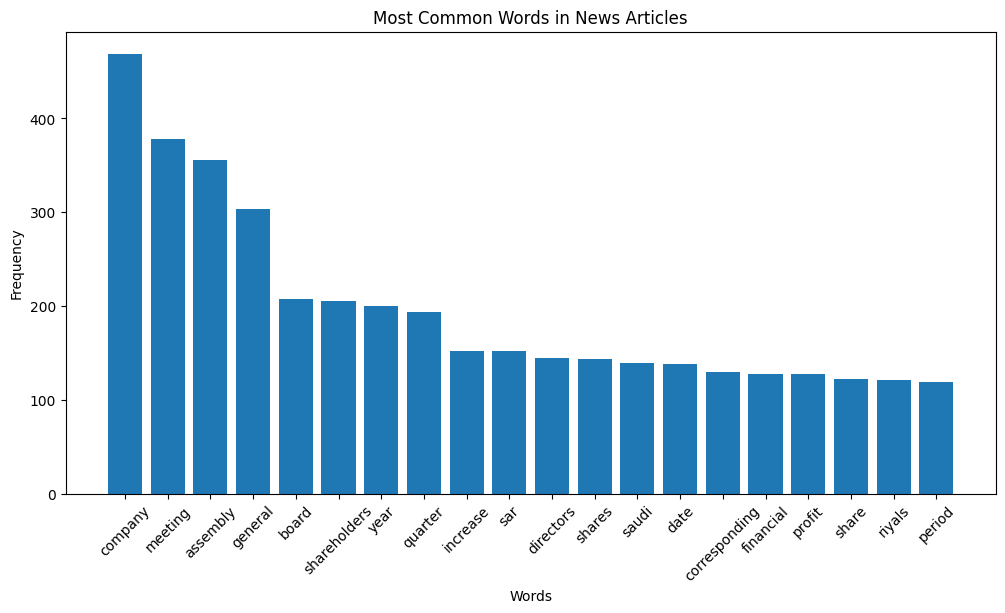

In [8]:
# Conduct some exploratory analysis of the text - word frequency
from collections import Counter
def word_frequency(text):
    words = text.split()
    return Counter(words)

df_news['WordFrequency'] = df_news['ProcessedContent'].apply(word_frequency)

# Display the word frequency of the first news article
print("*"*100,"\nSample Word Frequency: \n", df_news['WordFrequency'].iloc[0])
# Visualize the distribution of word frequencies across the dataset
import matplotlib.pyplot as plt
all_frequencies = Counter()
for freq in df_news['WordFrequency']:
    all_frequencies.update(freq)
most_common_words = all_frequencies.most_common(20)
words, counts = zip(*most_common_words)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title('Most Common Words in News Articles')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()



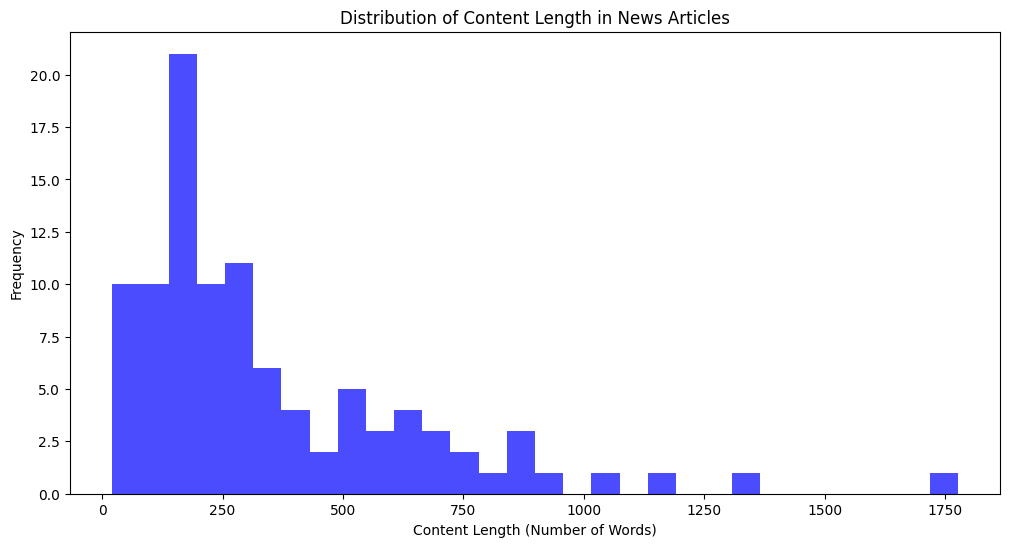

In [9]:
# Conduct some exploratory analysis of the text - content length distribution
df_news['ContentLength'] = df_news['Content'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 6))
plt.hist(df_news['ContentLength'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Content Length in News Articles')
plt.xlabel('Content Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()


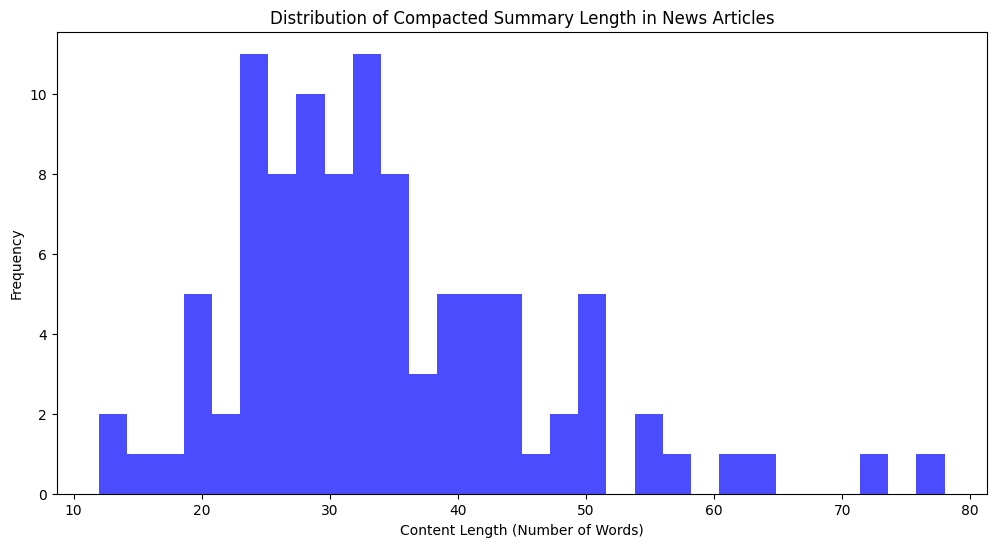

In [10]:
# Conduct some exploratory analysis of the text - CompactedSummary length distribution
df_news['CompactedSummaryLength'] = df_news['CompactedSummary'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 6))
plt.hist(df_news['CompactedSummaryLength'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Compacted Summary Length in News Articles')
plt.xlabel('Content Length (Number of Words)')
plt.ylabel('Frequency')
plt.show() 

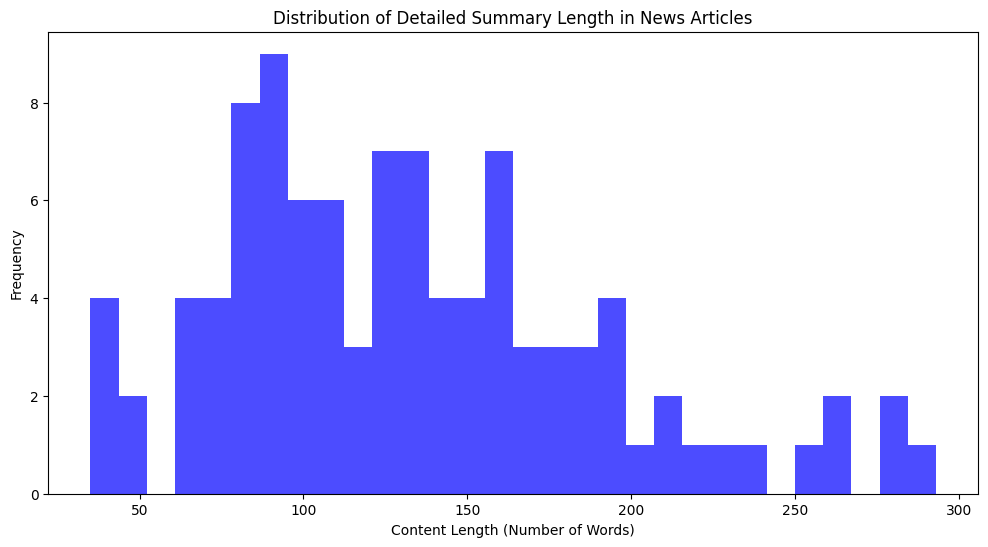

In [11]:
df_news['DetailedSummaryLength'] = df_news['DetailedSummary'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 6))
plt.hist(df_news['DetailedSummaryLength'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Detailed Summary Length in News Articles')
plt.xlabel('Content Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()


In [12]:
df_news.head()

,Date,Subject,Content,ParaphrasedSubject,CompactedSummary,DetailedSummary,Impact,ProcessedContent,WordFrequency,ContentLength,CompactedSummaryLength,DetailedSummaryLength
1102,15-May-24,ALYAMAMAH STEEL,Al Yamamah Steel Industries Co. announces its ...,Al Yamamah Steel Industries Co. Releases Half-...,Al Yamamah Steel Industries Co. reports improv...,Al Yamamah Steel Industries Co. has announced ...,Al Yamamah Steel Industries Co.'s positive fin...,al yamamah steel industries announces interim ...,"{'al': 1, 'yamamah': 1, 'steel': 1, 'industrie...",799,50,192
1686,5-Jun-24,SAUDI CERAMICS,Saudi Ceramic Co. calls its shareholders to at...,Saudi Ceramic Co. Announces Extraordinary Gene...,Saudi Ceramic Co. has invited shareholders to...,Saudi Ceramic Co. has called its shareholders...,The extraordinary general assembly meeting wi...,saudi ceramic calls shareholders attend extrao...,"{'saudi': 6, 'ceramic': 5, 'calls': 1, 'shareh...",1776,50,193
183,12-Mar-24,ALMARAI,The Board of Directors of Almarai Company Invi...,Almarai Company Invites Shareholders to Extrao...,Almarai Company's Board of Directors invites s...,"Almarai Company, a listed joint-stock company,...",This meeting allows shareholders to participat...,board directors almarai company invites shareh...,"{'board': 5, 'directors': 2, 'almarai': 2, 'co...",497,36,230
1491,29-May-24,NAHDI,Nahdi Medical Co. Announces the Results of the...,Nahdi Medical Co. Reports General Assembly Mee...,Nahdi Medical Co. disclosed the outcomes of i...,Nahdi Medical Company has revealed the result...,The General Assembly Meeting results reflect ...,nahdi medical co announces results ordinary ge...,"{'nahdi': 2, 'medical': 2, 'co': 1, 'announces...",186,33,91
1313,22-May-24,RAWASI,Rawasi Albina Investment Co. Board invites its...,Rawasi Albina Investment Co. Announces Ordinar...,Rawasi Albina Investment Co. has invited share...,Rawasi Albina Investment Co. has announced an ...,Shareholders are encouraged to participate in ...,rawasi albina investment board invites shareho...,"{'rawasi': 2, 'albina': 2, 'investment': 2, 'b...",682,40,206


## Information Extraction & Summarization:

In [13]:
# Implement methods to extract specific entities or key information, e.g., names, dates, locations, key metrics, sentiment, core issues. Rule-based methods: Using regular expressions or pattern matching.
import re
def extract_entities(text):
    # Example: Extract dates in the format 'YYYY-MM-DD'
    date_pattern = r'\b\d{4}-\d{2}-\d{2}\b'
    dates = re.findall(date_pattern, text)
    
    # Example: Extract monetary values (e.g., $1000, €500)
    money_pattern = r'\$\d+(?:,\d{3})*(?:\.\d{2})?|\€\d+(?:,\d{3})*(?:\.\d{2})?'
    money = re.findall(money_pattern, text)
    
    return {
        'dates': dates,
        'money': money
    }
df_news['ExtractedEntities'] = df_news['Content'].apply(extract_entities)
# Display the extracted entities for the first news article
for i in range(len(df_news)):
    print("*"*100,"\nSample Extracted Entities: \n", df_news['ExtractedEntities'].iloc[i])


**************************************************************************************************** 
Sample Extracted Entities: 
 {'dates': ['2024-03-31'], 'money': []}
**************************************************************************************************** 
Sample Extracted Entities: 
 {'dates': ['2024-06-26', '1445-12-20'], 'money': []}
**************************************************************************************************** 
Sample Extracted Entities: 
 {'dates': ['2024-04-02', '1445-09-23'], 'money': []}
**************************************************************************************************** 
Sample Extracted Entities: 
 {'dates': ['2024-05-28', '1445-11-20'], 'money': []}
**************************************************************************************************** 
Sample Extracted Entities: 
 {'dates': ['2024-06-12', '1445-12-06'], 'money': []}
**********************************************************************************************

In [14]:
# Implement methods to extract specific entities or key information, e.g., names, dates, locations, key metrics, sentiment, core issues. Traditional NLP: Using libraries like SpaCy or NLTK for Named Entity Recognition (NER) or Part-of-Speech (POS) tagging.
import spacy
# Load the SpaCy model for English

nlp = spacy.load("en_core_web_sm")
def extract_named_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities
df_news['NamedEntities'] = df_news['Content'].apply(extract_named_entities)
# Display the named entities for the first news article
for i in range(len(df_news)):
    print("*"*100,"\nSample Named Entities: \n", df_news['NamedEntities'].iloc[i])

**************************************************************************************************** 
Sample Named Entities: 
 [('Al Yamamah Steel Industries Co.', 'ORG'), ('Interim Financial', 'ORG'), ('the Period Ending on', 'ORG'), ('2024-03-31', 'DATE'), ('Six Months', 'DATE'), ('Quarter %', 'PERCENT'), ('Gross Profit', 'ORG'), ('7.063', 'MONEY'), ('867.336 72.932', 'CARDINAL'), ('Operational Profit', 'ORG'), ('47.769', 'CARDINAL'), ('29.549 3.36', 'CARDINAL'), ('30.542 -17.894 - 29.549', 'QUANTITY'), ('Millions', 'GPE'), ('Saudi Arabia', 'GPE'), ('848.88 32.84', 'CARDINAL'), ('141.316', 'CARDINAL'), ('Operational Profit', 'ORG'), ('96.888', 'CARDINAL'), ('60.091', 'CARDINAL'), ('60.091', 'CARDINAL'), ('Total Share Holders Equity', 'ORG'), ('578.238', 'CARDINAL'), ('1.18', 'CARDINAL'), ('Millions', 'GPE'), ('Saudi Arabia', 'GPE'), ('Millions', 'GPE'), ('Saudi Arabia', 'GPE'), ('the current quarter', 'DATE'), ('the same quarter of the last year', 'DATE'), ('SAR 109.91 million', 'ORG

In [15]:
# # Implement methods to extract specific entities or key information, e.g., names, dates, locations, key metrics, sentiment, core issues. Use pre-trained language models (e.g., via Hugging Face Transformers) for zero-shot or few-shot extraction/summarization.
# from transformers import pipeline
# # Load a pre-trained model for summarization
# summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
# def summarize_text(text):
#     summary = summarizer(text, max_length=130, min_length=30, do_sample=False)
#     return summary[0]['summary_text']
# df_news['Summary'] = df_news['Content'].apply(summarize_text)
# # Display the summary for the first news article
# for i in range(len(df_news)):
#     print("*"*100,"\nSample Summary: \n", df_news['Summary'].iloc[i])


### Text Summarization (Abstractive) using LLM

In [20]:
# Implement a text summarization technique (abstractive summarization approach using LLMs).
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_openai import AzureChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from tqdm import tqdm
tqdm.pandas()

model = AzureChatOpenAI(model=os.getenv("AZURE_OPENAI_MODEL_DEPLOYMENT_NAME"))

system_prompt = """You are a helpful assistant that summarizes news articles. 
Please provide a concise summary of the article content provided by the user. 
Keep the summary under 50 words."""
prompt_temp = ChatPromptTemplate([("system",system_prompt),("user","{content}")])
parser = StrOutputParser()

chain = prompt_temp | model | parser

# Just limiting to 1 examample to avoid LLM API over consumption or Rate limitations
df_sample = df_news[:1]
df_sample['LLMSummary'] = df_sample['Content'].progress_apply(lambda x: chain.invoke({"content":x}))
# Display the LLM summary for the first news article
for i in range(len(df_sample)):
    print("*"*100,"\nSample Content: \n", df_sample['Content'].iloc[i])
    print("\nSample Compact Summary (Ground truth): \n", df_sample['CompactedSummary'].iloc[i])
    print("\nSample LLM Summary: \n", df_sample['LLMSummary'].iloc[i])

100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

**************************************************************************************************** 
Sample Content: 
 Al Yamamah Steel Industries Co. announces its Interim Financial results for the Period Ending on 2024-03-31 ( Six Months )  Element List Current Quarter Similar quarter for previous year %Change Previous Quarter % Change
Sales/Revenue 496.944 387.034 28.398 630.715 -21.209
Gross Profit (Loss) 68.323 7.063 867.336 72.932 -6.319
Operational Profit (Loss) 47.769 -9.259 - 49.119 -2.748
Net profit (Loss) 30.542 -17.894 - 29.549 3.36
Total Comprehensive Income 30.542 -17.894 - 29.549 3.36
All figures are in (Millions) Saudi Arabia, Riyals Element List Current Period Similar period for previous year %Change
Sales/Revenue 1,127.659 848.88 32.84
Gross Profit (Loss) 141.316 -10.888 -
Operational Profit (Loss) 96.888 -45.171 -
Net profit (Loss) 60.091 -59.794 -
Total Comprehensive Income 60.091 -59.794 -
Total Share Holders Equity (After Deducting the Minority Equity) 578.238 58


/var/folders/vn/bms3f33d4g96sk1pwszpjv340000gn/T/ipykernel_66135/1699926741.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['LLMSummary'] = df_sample['Content'].progress_apply(lambda x: chain.invoke({"content":x}))


In [21]:
df_sample.head()

,Date,Subject,Content,ParaphrasedSubject,CompactedSummary,DetailedSummary,Impact,ProcessedContent,WordFrequency,ContentLength,CompactedSummaryLength,DetailedSummaryLength,ExtractedEntities,NamedEntities,LLMSummary
1102,15-May-24,ALYAMAMAH STEEL,Al Yamamah Steel Industries Co. announces its ...,Al Yamamah Steel Industries Co. Releases Half-...,Al Yamamah Steel Industries Co. reports improv...,Al Yamamah Steel Industries Co. has announced ...,Al Yamamah Steel Industries Co.'s positive fin...,al yamamah steel industries announces interim ...,"{'al': 1, 'yamamah': 1, 'steel': 1, 'industrie...",799,50,192,"{'dates': ['2024-03-31'], 'money': []}","[(Al Yamamah Steel Industries Co., ORG), (Inte...",Al Yamamah Steel Industries reported significa...


### Evaluate Summarization Quality

In [22]:
import evaluate

prediction = df_sample['LLMSummary'].str.lower().tolist()
actual = df_sample['CompactedSummary'].str.lower().tolist()

bleu = evaluate.load("bleu")
results = bleu.compute(predictions=prediction,references=actual)
print("BLEU: ", results)

rouge = evaluate.load("rouge")
results = rouge.compute(predictions=prediction,references=actual)
print("ROUGE", results)

meteor = evaluate.load("meteor")
results = meteor.compute(predictions=prediction,references=actual)
print("METEOR", results)

BLEU:  {'bleu': 0.08945461224273302, 'precisions': [0.44, 0.16326530612244897, 0.0625, 0.02127659574468085], 'brevity_penalty': 0.9048374180359595, 'length_ratio': 0.9090909090909091, 'translation_length': 50, 'reference_length': 55}
ROUGE {'rouge1': np.float64(0.3877551020408163), 'rouge2': np.float64(0.125), 'rougeL': np.float64(0.2857142857142857), 'rougeLsum': np.float64(0.2857142857142857)}
METEOR {'meteor': np.float64(0.364044776119403)}


[nltk_data] Downloading package wordnet to /Users/ks/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/ks/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/ks/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
